In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, validation_curve, StratifiedShuffleSplit
from sklearn import metrics

In [ ]:
# The three datasets created during the feature selection process are uploaded. 
# Each dataset contains a different ordering of the feature variables based on their importance.

featuresMIC = pd.read_csv('featuresRankedMIC.csv')
featuresFC = pd.read_csv('featuresRankedFC.csv')
featuresRFC = pd.read_csv('featuresRankedRFC.csv')

# Mutual Information Gain

In [ ]:
# The top 20 features will be selected from each dataset for machine learning.

X = featuresMIC.iloc[:,0:20]
y = featuresMIC['WinningRecord']

In [ ]:
featuresMIC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,SV,1Run,Under500,BB_P,H_P,R/G,#a-tA-S,DefEff,HR_P,BatAge,BB,WP,HR,SOS,IP,Rtot,IBB
0,0.173913,0.44,0.477612,0.302094,0.559387,0.402703,0.429180,0.622353,0.339394,0.45,0.602041,0.418914,0.292135,0.465585,0.687796,0.380797,0.545455,0.678982,0.391473,0.288005
1,0.637681,0.32,0.000000,0.194577,0.390805,0.389189,0.154861,0.181001,0.133333,0.65,1.000000,0.123964,0.460674,0.410213,0.262041,0.213898,0.454545,0.697641,0.841085,0.380978
2,0.231884,0.56,0.300995,0.265422,0.641762,0.385135,0.429180,0.464920,0.363636,0.75,0.581633,0.189573,0.483146,0.440077,0.221357,0.303797,0.454545,0.710241,0.372093,0.322774
3,0.275362,0.36,0.161692,0.100396,0.618774,0.271622,0.688073,0.159225,0.000000,0.40,0.867347,0.142855,0.505618,0.021753,0.435667,0.126699,0.454545,0.680184,0.569767,0.343635
4,0.594203,0.46,0.208955,0.390013,0.392720,0.528378,0.204570,0.482468,0.442424,0.60,0.663265,0.233241,0.606742,0.540521,0.218771,0.335165,0.363636,0.752545,0.441860,0.520958


In [ ]:
# A stratified train-test split is performed on the dataset, with 80% of the data assigned to training set and 20% assigned to testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Parameters for KNN algorithm 

KNNmetrics = ['manhattan','minkowski','euclidean']
n_neighbors = np.arange(1,30,2)

[0.90055502 0.89518179 0.89518179]


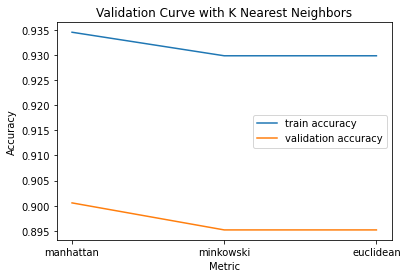

In [ ]:
# 10-fold cross validation is performed on the training set for parameter tuning.
# The manhattan, minkowski, and euclidean distance metrics are assessed for accuracy

train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="metric", param_range=KNNmetrics, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("Metric")
plt.ylabel("Accuracy")
plt.plot(KNNmetrics, train_scores_mean, label="train accuracy")
plt.plot(KNNmetrics, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.85484234 0.89337999 0.90055502 0.90591216 0.90591216 0.89785232
 0.90679698 0.90679698 0.90948359 0.91574968 0.91932111 0.92111486
 0.92382561 0.92561133 0.92291667]


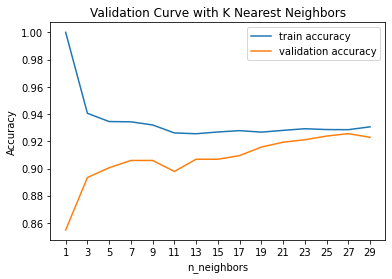

In [ ]:
# Manhattan distance metric appears to perform best on the training set and validation set.
# The n_neighbors parameter is tested next for model accuracy. 

train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_mean, label="train accuracy")
plt.plot(n_neighbors, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02917315 0.02789745 0.03137717 0.03381187 0.0295232  0.02635259
 0.02018439 0.02061058 0.01949552 0.01980004 0.0238262  0.02084718
 0.01806564 0.01507868 0.01850869]


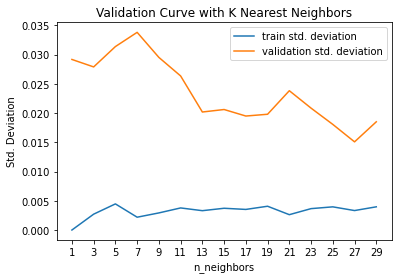

In [ ]:
# The standard deviation is evaluated for each value of K

train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_std, label="train std. deviation")
plt.plot(n_neighbors, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=25, metric='manhattan')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

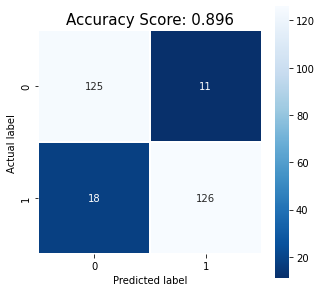

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  126 
FP:  11 
TN:  125 
FN:  18

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       136
           1       0.92      0.88      0.90       144

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



# ANOVA F-test

In [ ]:
# The above process is now repeated for the top 20 features as selected by the ANOVA F-test selection algorithm.

X = featuresFC.iloc[:,0:20]
y = featuresFC['WinningRecord']

In [ ]:
featuresFC.iloc[:,0:20].head()

,ERA+,RA/G,OPS+,1Run,H_P,SV,BB_P,#a-tA-S,R/G,DefEff,Rtot,Under500,IP,BB,PAge,PA,IBB,BatAge,HR_P,SF
0,0.173913,0.477612,0.44,0.559387,0.622353,0.302094,0.429180,0.45,0.339394,0.602041,0.391473,0.402703,0.678982,0.465585,0.405941,0.594126,0.288005,0.292135,0.418914,0.358281
1,0.637681,0.000000,0.32,0.390805,0.181001,0.194577,0.154861,0.65,0.133333,1.000000,0.841085,0.389189,0.697641,0.410213,0.465347,0.356231,0.380978,0.460674,0.123964,0.398932
2,0.231884,0.300995,0.56,0.641762,0.464920,0.265422,0.429180,0.75,0.363636,0.581633,0.372093,0.385135,0.710241,0.440077,0.475248,0.523644,0.322774,0.483146,0.189573,0.538171
3,0.275362,0.161692,0.36,0.618774,0.159225,0.100396,0.688073,0.40,0.000000,0.867347,0.569767,0.271622,0.680184,0.021753,0.336634,0.279588,0.343635,0.505618,0.142855,0.124424
4,0.594203,0.208955,0.46,0.392720,0.482468,0.390013,0.204570,0.60,0.442424,0.663265,0.441860,0.528378,0.752545,0.540521,0.455446,0.566620,0.520958,0.606742,0.233241,0.443268


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.8933639 0.8880148 0.8880148]


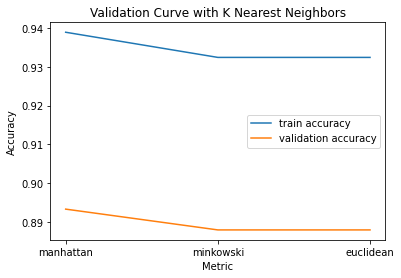

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="metric", param_range=KNNmetrics, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("Metric")
plt.ylabel("Accuracy")
plt.plot(KNNmetrics, train_scores_mean, label="train accuracy")
plt.plot(KNNmetrics, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.86379505 0.88441924 0.8933639  0.88980051 0.89785232 0.90230051
 0.90232465 0.90500322 0.90499517 0.91213803 0.91124517 0.91125322
 0.91124517 0.90944337 0.91034427]


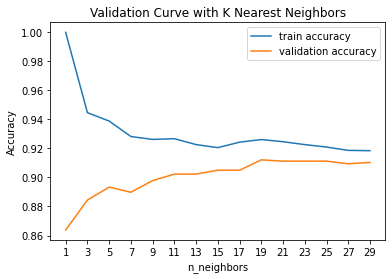

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_mean, label="train accuracy")
plt.plot(n_neighbors, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.03024712 0.0242586  0.03034205 0.03227753 0.02840147 0.03554162
 0.03748231 0.03503088 0.03686598 0.04077803 0.03713405 0.03818651
 0.03182461 0.03286589 0.03041107]


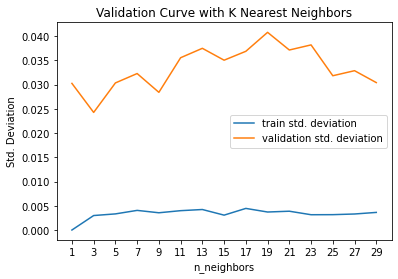

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_std, label="train std. deviation")
plt.plot(n_neighbors, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=19, metric='manhattan')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

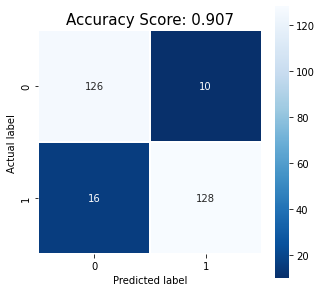

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  128 
FP:  10 
TN:  126 
FN:  16

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       136
           1       0.93      0.89      0.91       144

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280



# Random Forest

In [ ]:
# The above process is now repeated for the top 20 features as selected by the Random Forest selection algorithm.

X = featuresRFC.iloc[:,0:20]
y = featuresRFC['WinningRecord']

In [ ]:
featuresRFC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,R/G,1Run,SV,H_P,BB_P,#a-tA-S,Under500,DefEff,Rtot,PA,IP,BB,PAge,HR_P,HR,BatAge,IBB
0,0.173913,0.44,0.477612,0.339394,0.559387,0.302094,0.622353,0.429180,0.45,0.402703,0.602041,0.391473,0.594126,0.678982,0.465585,0.405941,0.418914,0.380797,0.292135,0.288005
1,0.637681,0.32,0.000000,0.133333,0.390805,0.194577,0.181001,0.154861,0.65,0.389189,1.000000,0.841085,0.356231,0.697641,0.410213,0.465347,0.123964,0.213898,0.460674,0.380978
2,0.231884,0.56,0.300995,0.363636,0.641762,0.265422,0.464920,0.429180,0.75,0.385135,0.581633,0.372093,0.523644,0.710241,0.440077,0.475248,0.189573,0.303797,0.483146,0.322774
3,0.275362,0.36,0.161692,0.000000,0.618774,0.100396,0.159225,0.688073,0.40,0.271622,0.867347,0.569767,0.279588,0.680184,0.021753,0.336634,0.142855,0.126699,0.505618,0.343635
4,0.594203,0.46,0.208955,0.442424,0.392720,0.390013,0.482468,0.204570,0.60,0.528378,0.663265,0.441860,0.566620,0.752545,0.540521,0.455446,0.233241,0.335165,0.606742,0.520958


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.90497909 0.90237291 0.90237291]


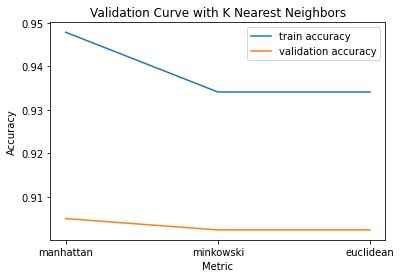

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="metric", param_range=KNNmetrics, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("Metric")
plt.ylabel("Accuracy")
plt.plot(KNNmetrics, train_scores_mean, label="train accuracy")
plt.plot(KNNmetrics, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.85036197 0.88712194 0.90497909 0.90409427 0.90679698 0.90590412
 0.91216216 0.90769788 0.91216216 0.91125322 0.91574968 0.91843629
 0.91574163 0.91395592 0.91303893]


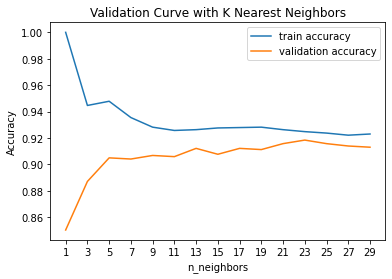

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_mean, label="train accuracy")
plt.plot(n_neighbors, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02726307 0.02360006 0.02460746 0.026372   0.02978538 0.02759581
 0.02999964 0.02840803 0.02977636 0.02742374 0.02670632 0.02618986
 0.02702883 0.02730062 0.03012542]


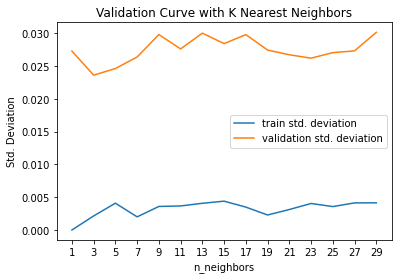

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_std, label="train std. deviation")
plt.plot(n_neighbors, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=23, metric='manhattan')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

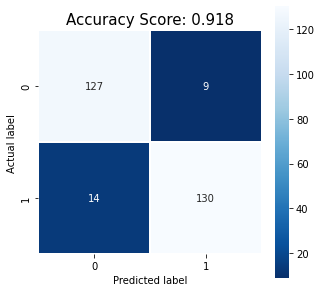

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  130 
FP:  9 
TN:  127 
FN:  14

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       136
           1       0.94      0.90      0.92       144

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280

